In [1]:
import pandas as pd

### Overview

In [2]:
df = pd.read_csv('train.csv')
df.shape

(10886, 12)

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Preprocessing

In [5]:
sample = '2011-01-01 00:00:00'
year = int(sample[:4]) 
month = int(sample.split(' ')[0].split('-')[1])
day = int(sample.split(' ')[0].split('-')[2])
hour = int(sample.split(' ')[1].split(':')[0])
minute = int(sample.split(' ')[1].split(':')[1]) 
sec = int(sample.split(' ')[1].split(':')[2] )

In [6]:
print(year, month, day, hour, minute, sec)

2011 1 1 0 0 0


In [7]:
df['year'] = df['datetime'].apply(lambda x: int(x[:4]))
df['month'] = df['datetime'].apply(lambda x: int(x.split(' ')[0].split('-')[1]))
df['day'] = df['datetime'].apply(lambda x: int(x.split(' ')[0].split('-')[2]))
df['hour'] = df['datetime'].apply(lambda x: int(x.split(' ')[1].split(':')[0]))

In [8]:
sample = '2011-01-01 00:00:00'
day = pd.to_datetime(sample)
day

Timestamp('2011-01-01 00:00:00')

In [9]:
df['dayofweek'] = df['datetime'].apply(lambda x: pd.to_datetime(x).dayofweek)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


### EDA

<AxesSubplot:xlabel='hour', ylabel='count'>

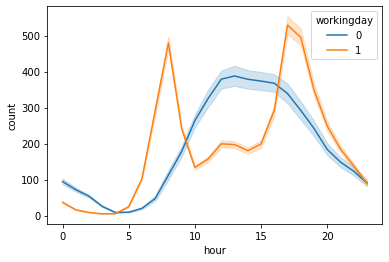

In [10]:
import seaborn as sns
sns.lineplot(data = df, x = 'hour', y = 'count', hue = 'workingday')

<AxesSubplot:xlabel='hour', ylabel='casual'>

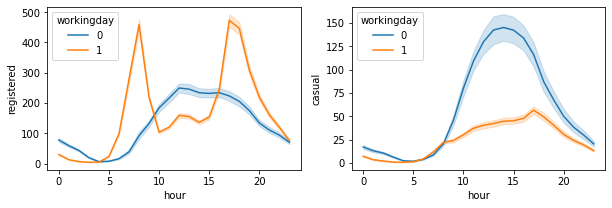

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (10, 3))

sns.lineplot(data = df, x = 'hour', y = 'registered', hue = 'workingday', ax = ax[0])
sns.lineplot(data = df, x = 'hour', y = 'casual', hue = 'workingday', ax = ax[1])

### Data preparation

In [12]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'dayofweek']

label = 'count'

In [13]:
train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()
x_train, y_train = train[features], train[label]
x_test, y_test = test[features], test[label]

### Modeling

In [14]:
from sklearn.ensemble import RandomForestRegressor as rf
model = rf()
model.fit(x_train, y_train)

RandomForestRegressor()

In [15]:
model.score(x_test, y_test)

0.9251196096116507

In [16]:
model.score(x_train, y_train)

0.9919752107098246

In [22]:
fi_df = pd.DataFrame()
fi_df['feature'] = features
fi_df['imp'] = model.feature_importances_
fi_df.sort_values(by = 'imp', ascending = False) 

,feature,imp
11,hour,0.610569
8,year,0.070414
5,atemp,0.056817
4,temp,0.052403
2,workingday,0.049904
12,dayofweek,0.045774
9,month,0.044069
6,humidity,0.024819
3,weather,0.015733
10,day,0.010065


<AxesSubplot:xlabel='imp', ylabel='feature'>

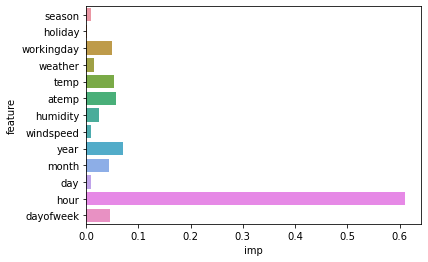

In [23]:
sns.barplot(data = fi_df, x = 'imp', y = 'feature')